In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn import model_selection
from sklearn import tree
import warnings

In [2]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Subject_Characteristics/PPMI_Baseline_Data_02Jul2018.csv')
PD_patlist=x[x['APPRDX']==1]['PATNO']
per='V04'

In [3]:
year=pd.DataFrame()
year['PATNO']=PD_patlist

In [4]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Medical_History/Vital_Signs.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x=x.iloc[:,np.r_[2,6:9,10:16]]
x['BMI']=x['WGTKG']/((x['HTCM']/100)*(x['HTCM']/100))
year=year.merge(x.loc[:,['PATNO','BMI','SYSSUP','HRSUP']],on='PATNO',how='left')
year

,PATNO,BMI,SYSSUP,HRSUP
0,3001,22.066947,139.0,66.0
1,3002,28.160551,120.0,70.0
2,3003,26.974040,110.0,63.0
3,3006,22.195131,145.0,62.0
4,3007,NaN,NaN,NaN
...,...,...,...,...
418,4124,28.997894,144.0,55.0
419,4125,NaN,NaN,NaN
420,4126,37.103007,125.0,60.0
421,4135,40.729066,134.0,72.0


In [5]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Motor_Assessments/MDS_UPDRS_Part_I.csv')
y=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Motor_Assessments/MDS_UPDRS_Part_I__Patient_Questionnaire.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]

y=y[y['PATNO'].isin(PD_patlist)]
y=y[y['EVENT_ID']==per]
x=x.iloc[:,np.r_[2,7:13]]
y=y.iloc[:,np.r_[2,7:14]]
x=x.merge(y,how='outer',on='PATNO')
x['Cognitive']=x.loc[:,['NP1COG','NP1HALL','NP1DPRS','NP1ANXS','NP1APAT','NP1DDS']].sum(axis=1,skipna=False)
x['Sleep']=x.loc[:,['NP1SLPN','NP1SLPD']].sum(axis=1,skipna=False)
x['Autonomic_Nervous_System']=x.loc[:,['NP1URIN','NP1CNST','NP1LTHD','NP1FATG']].sum(axis=1,skipna=False)
x['Total_UPDRS1']=x.loc[:,'NP1COG':'NP1FATG'].sum(axis=1,skipna=False)

year=year.merge(x.iloc[:,np.r_[0,14:18]],on='PATNO',how='left')

year

,PATNO,BMI,SYSSUP,HRSUP,Cognitive,Sleep,Autonomic_Nervous_System,Total_UPDRS1
0,3001,22.066947,139.0,66.0,4.0,2.0,6.0,12.0
1,3002,28.160551,120.0,70.0,3.0,2.0,3.0,8.0
2,3003,26.974040,110.0,63.0,0.0,4.0,5.0,10.0
3,3006,22.195131,145.0,62.0,2.0,0.0,0.0,3.0
4,3007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
418,4124,28.997894,144.0,55.0,0.0,3.0,1.0,5.0
419,4125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,4126,37.103007,125.0,60.0,0.0,0.0,0.0,0.0
421,4135,40.729066,134.0,72.0,6.0,5.0,5.0,19.0


In [6]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Motor_Assessments/MDS_UPDRS_Part_II__Patient_Questionnaire.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x['Bulbar']=x.loc[:,['NP2SPCH','NP2SALV','NP2SWAL','NP2EAT']].sum(axis=1,skipna=False)
x['Common_daily_act']= x.loc[:,['NP2DRES','NP2HYGN','NP2HWRT','NP2HOBB']].sum(axis=1,skipna=False)
x['Bed']=x.loc[:,['NP2TURN','NP2RISE']].sum(axis=1,skipna=False)
x['Gait']=x.loc[:,['NP2WALK','NP2FREZ']].sum(axis=1,skipna=False)
x['Total_UPDRS2']=x.loc[:,'NP2SPCH':'NP2FREZ'].sum(axis=1,skipna=False)
x=x.loc[:,['PATNO','Bulbar','Common_daily_act','Bed','Gait','Total_UPDRS2']]
year=year.merge(x,on='PATNO',how='left')
year

,PATNO,BMI,SYSSUP,HRSUP,Cognitive,Sleep,Autonomic_Nervous_System,Total_UPDRS1,Bulbar,Common_daily_act,Bed,Gait,Total_UPDRS2
0,3001,22.066947,139.0,66.0,4.0,2.0,6.0,12.0,0.0,1.0,0.0,0.0,3.0
1,3002,28.160551,120.0,70.0,3.0,2.0,3.0,8.0,7.0,5.0,1.0,1.0,15.0
2,3003,26.974040,110.0,63.0,0.0,4.0,5.0,10.0,1.0,2.0,0.0,1.0,5.0
3,3006,22.195131,145.0,62.0,2.0,0.0,0.0,3.0,5.0,4.0,1.0,1.0,12.0
4,3007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,4124,28.997894,144.0,55.0,0.0,3.0,1.0,5.0,1.0,1.0,1.0,0.0,4.0
419,4125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,4126,37.103007,125.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
421,4135,40.729066,134.0,72.0,6.0,5.0,5.0,19.0,3.0,4.0,4.0,3.0,15.0


In [7]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Motor_Assessments/MDS_UPDRS_Part_III.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x=x[x['PAG_NAME']=='NUPDRS3']
x=x.iloc[:,np.r_[2,11:44]]
x['Axial_Sub_1']=x.loc[:,['NP3SPCH','NP3FACXP','NP3RIGN',
                     'NP3RISNG','NP3GAIT','NP3FRZGT',
                     'NP3PSTBL','NP3POSTR','NP3BRADY','NP3RTALJ']].sum(axis=1,skipna=False)
x['Axial_Sub_2']=x.loc[:,['NP3RISNG','NP3GAIT','NP3FRZGT',
                     'NP3PSTBL','NP3POSTR','NP3BRADY']].sum(axis=1,skipna=False)
x['Limb_Rig_Sub']=x.loc[:,['NP3RIGRU','NP3RIGLU','PN3RIGRL','NP3RIGLL']].sum(axis=1,skipna=False)
x['Limb_Brady_Sub']=x.loc[:,['NP3FTAPR','NP3FTAPL','NP3HMOVR','NP3HMOVL',
                             'NP3PRSPR','NP3PRSPL','NP3TTAPR','NP3TTAPL',
                            'NP3LGAGR','NP3LGAGL']].sum(axis=1,skipna=False)
x['Tremor_Sub']=x.loc[:,['NP3PTRMR','NP3PTRML','NP3KTRMR','NP3KTRML','NP3RTARU',
                          'NP3RTALU','NP3RTARL','NP3RTALL','NP3RTCON']].sum(axis=1,skipna=False)
x['Rest_Tremor_Sub']=x.loc[:,['NP3RTARU','NP3RTALU','NP3RTARL','NP3RTALL','NP3RTCON']].sum(axis=1,skipna=False)
x['Append_Sub']=x.loc[:,['Limb_Rig_Sub','Limb_Brady_Sub','Tremor_Sub']].sum(axis=1,skipna=False)
x['Left_Motor_Score']=x.loc[:,['NP3RIGLU','NP3RIGLL','NP3FTAPL','NP3HMOVL',
                                 'NP3PRSPL','NP3TTAPL','NP3LGAGL','NP3PTRML',
                                 'NP3KTRML','NP3RTALU','NP3RTALL']].sum(axis=1,skipna=False)
x['Right_Motor_Score']=x.loc[:,['NP3RIGRU','PN3RIGRL','NP3FTAPR','NP3HMOVR',
                                  'NP3PRSPR','NP3TTAPR','NP3LGAGR','NP3PTRMR',
                                  'NP3KTRMR','NP3RTARU','NP3RTARL']].sum(axis=1,skipna=False)
x['Diff']=x['Left_Motor_Score']-x['Right_Motor_Score']
x['Asymmetry']=np.abs(x['Diff'])

x['Total_UPDRS3']=x.loc[:,'NP3SPCH':'NP3RTCON'].sum(axis=1,skipna=False)

x=x.loc[:,['PATNO','Axial_Sub_1','Axial_Sub_2','Limb_Rig_Sub','Limb_Brady_Sub','Tremor_Sub','Rest_Tremor_Sub',
          'Append_Sub','Left_Motor_Score','Right_Motor_Score','Diff','Asymmetry','Total_UPDRS3']]

year=year.merge(x,on='PATNO',how='left')
year['Total_UPDRS']=year['Total_UPDRS1']+year['Total_UPDRS2']+year['Total_UPDRS3']
year

,PATNO,BMI,SYSSUP,HRSUP,Cognitive,Sleep,Autonomic_Nervous_System,Total_UPDRS1,Bulbar,Common_daily_act,...,Limb_Brady_Sub,Tremor_Sub,Rest_Tremor_Sub,Append_Sub,Left_Motor_Score,Right_Motor_Score,Diff,Asymmetry,Total_UPDRS3,Total_UPDRS
0,3001,22.066947,139.0,66.0,4.0,2.0,6.0,12.0,0.0,1.0,...,7.0,6.0,0.0,16.0,5.0,11.0,-6.0,6.0,20.0,35.0
1,3002,28.160551,120.0,70.0,3.0,2.0,3.0,8.0,7.0,5.0,...,13.0,6.0,3.0,21.0,13.0,7.0,6.0,6.0,27.0,50.0
2,3003,26.974040,110.0,63.0,0.0,4.0,5.0,10.0,1.0,2.0,...,20.0,6.0,3.0,34.0,9.0,24.0,-15.0,15.0,44.0,59.0
3,3006,22.195131,145.0,62.0,2.0,0.0,0.0,3.0,5.0,4.0,...,23.0,3.0,0.0,28.0,12.0,16.0,-4.0,4.0,33.0,48.0
4,3007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,4124,28.997894,144.0,55.0,0.0,3.0,1.0,5.0,1.0,1.0,...,15.0,2.0,2.0,22.0,6.0,15.0,-9.0,9.0,27.0,36.0
419,4125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,4126,37.103007,125.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,...,7.0,0.0,0.0,8.0,1.0,7.0,-6.0,6.0,17.0,19.0
421,4135,40.729066,134.0,72.0,6.0,5.0,5.0,19.0,3.0,4.0,...,10.0,6.0,2.0,17.0,8.0,9.0,-1.0,1.0,24.0,58.0


In [8]:
year['Total_UPDRS3'].dropna()

0      20.0
1      27.0
2      44.0
3      33.0
5      31.0
       ... 
417    28.0
418    27.0
420    17.0
421    24.0
422    33.0
Name: Total_UPDRS3, Length: 340, dtype: float64

In [9]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Motor_Assessments/Modified_Schwab_+_England_ADL.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x=x.loc[:,['PATNO','MSEADLG']]
year=year.merge(x,on='PATNO',how='left')



In [10]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Non-Motor-Asses/Neurophysiological/Benton_Judgment_of_Line_Orientation.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x=x.loc[:,['PATNO','DVS_JLO_MSSAE']]
year=year.merge(x,on='PATNO',how='left')

In [11]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Non-Motor-Asses/Sleep_Disorder/Epworth_Sleepiness_Scale.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x['Epworth_SUM']=x.loc[:,'ESS1':'ESS8'].sum(axis=1,skipna=False)
x=x.loc[:,['PATNO','Epworth_SUM']]
year=year.merge(x,on='PATNO',how='left')

In [12]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Non-Motor-Asses/NeuroBehavioral/Geriatric_Depression_Scale__Short_.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x=x.iloc[:,np.r_[2,6:21,]]
no=['GDSSATIS', 'GDSGSPIR', 'GDSHAPPY', 'GDSALIVE', 'GDSENRGY']
x['GDS_SUM']=np.zeros(len(x))
for i in no:
    x[i]=1-x[i]
x['GDS_SUM']=x.loc[:,'GDSSATIS':'GDSBETER'].sum(axis=1,skipna=False)
x=x.loc[:,['PATNO','GDS_SUM']]
year=year.merge(x,on='PATNO',how='left')
year


,PATNO,BMI,SYSSUP,HRSUP,Cognitive,Sleep,Autonomic_Nervous_System,Total_UPDRS1,Bulbar,Common_daily_act,...,Left_Motor_Score,Right_Motor_Score,Diff,Asymmetry,Total_UPDRS3,Total_UPDRS,MSEADLG,DVS_JLO_MSSAE,Epworth_SUM,GDS_SUM
0,3001,22.066947,139.0,66.0,4.0,2.0,6.0,12.0,0.0,1.0,...,5.0,11.0,-6.0,6.0,20.0,35.0,95.0,11.06,3.0,2.0
1,3002,28.160551,120.0,70.0,3.0,2.0,3.0,8.0,7.0,5.0,...,13.0,7.0,6.0,6.0,27.0,50.0,90.0,11.06,14.0,5.0
2,3003,26.974040,110.0,63.0,0.0,4.0,5.0,10.0,1.0,2.0,...,9.0,24.0,-15.0,15.0,44.0,59.0,90.0,12.16,6.0,1.0
3,3006,22.195131,145.0,62.0,2.0,0.0,0.0,3.0,5.0,4.0,...,12.0,16.0,-4.0,4.0,33.0,48.0,90.0,7.12,6.0,0.0
4,3007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,4124,28.997894,144.0,55.0,0.0,3.0,1.0,5.0,1.0,1.0,...,6.0,15.0,-9.0,9.0,27.0,36.0,95.0,4.92,12.0,5.0
419,4125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,4126,37.103007,125.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,7.0,-6.0,6.0,17.0,19.0,95.0,16.38,3.0,1.0
421,4135,40.729066,134.0,72.0,6.0,5.0,5.0,19.0,3.0,4.0,...,8.0,9.0,-1.0,1.0,24.0,58.0,90.0,7.12,4.0,3.0


In [13]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Non-Motor-Asses/Neurophysiological/Hopkins_Verbal_Learning_Test.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x=x.iloc[:,np.r_[2,16]]
year=year.merge(x,on='PATNO',how='left')
year

,PATNO,BMI,SYSSUP,HRSUP,Cognitive,Sleep,Autonomic_Nervous_System,Total_UPDRS1,Bulbar,Common_daily_act,...,Right_Motor_Score,Diff,Asymmetry,Total_UPDRS3,Total_UPDRS,MSEADLG,DVS_JLO_MSSAE,Epworth_SUM,GDS_SUM,DVT_TOTAL_RECALL
0,3001,22.066947,139.0,66.0,4.0,2.0,6.0,12.0,0.0,1.0,...,11.0,-6.0,6.0,20.0,35.0,95.0,11.06,3.0,2.0,49.0
1,3002,28.160551,120.0,70.0,3.0,2.0,3.0,8.0,7.0,5.0,...,7.0,6.0,6.0,27.0,50.0,90.0,11.06,14.0,5.0,52.0
2,3003,26.974040,110.0,63.0,0.0,4.0,5.0,10.0,1.0,2.0,...,24.0,-15.0,15.0,44.0,59.0,90.0,12.16,6.0,1.0,49.0
3,3006,22.195131,145.0,62.0,2.0,0.0,0.0,3.0,5.0,4.0,...,16.0,-4.0,4.0,33.0,48.0,90.0,7.12,6.0,0.0,32.0
4,3007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,4124,28.997894,144.0,55.0,0.0,3.0,1.0,5.0,1.0,1.0,...,15.0,-9.0,9.0,27.0,36.0,95.0,4.92,12.0,5.0,46.0
419,4125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,4126,37.103007,125.0,60.0,0.0,0.0,0.0,0.0,0.0,1.0,...,7.0,-6.0,6.0,17.0,19.0,95.0,16.38,3.0,1.0,46.0
421,4135,40.729066,134.0,72.0,6.0,5.0,5.0,19.0,3.0,4.0,...,9.0,-1.0,1.0,24.0,58.0,90.0,7.12,4.0,3.0,44.0


In [14]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Non-Motor-Asses/Neurophysiological/Letter_-_Number_Sequencing__PD_.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x=x.loc[:,['PATNO','DVS_LNS']]
year=year.merge(x,on='PATNO',how='left')

In [15]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Non-Motor-Asses/Neurophysiological/Montreal_Cognitive_Assessment__MoCA_.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x=x.loc[:,['PATNO','MCATOT']]
year=year.merge(x,on='PATNO',how='left')

In [16]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Non-Motor-Asses/NeuroBehavioral/QUIP_Current_Short.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x=x.iloc[:,np.r_[2,7:20]]
x['QUIP_Sum']=x.loc[:,'TMGAMBLE':'CNTRLDSM'].sum(axis=1,skipna=False)
x['QUIP_Buying']=x.loc[:,['TMBUY','CNTRLBUY']].sum(axis=1,skipna=False)
x['QUIP_Eating']=x.loc[:,['TMEAT','CNTRLEAT']].sum(axis=1,skipna=False)
x['QUIP_Gamble']=x.loc[:,['TMGAMBLE','CNTRLGMB']].sum(axis=1,skipna=False)
x['QUIP_Hobbies']=x.loc[:,['TMTORACT']].sum(axis=1,skipna=False)
x['QUIP_Punding']=x.loc[:,['TMTMTACT']].sum(axis=1,skipna=False)
x['QUIP_Sex']=x.loc[:,['TMSEX','CNTRLSEX']].sum(axis=1,skipna=False)
x['QUIP_Driving']=x.loc[:,['TMTRWD']].sum(axis=1,skipna=False)
                          
x=x.loc[:,['PATNO','QUIP_Sum']]
year=year.merge(x,on='PATNO',how='left')

In [17]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Non-Motor-Asses/Sleep_Disorder/REM_Sleep_Disorder_Questionnaire.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x=x.iloc[:,np.r_[2,7:28]]
x['REM_Sum']=x.loc[:,'DRMVIVID':'CNSOTH'].sum(axis=1,skipna=False)
x=x.loc[:,['PATNO','REM_Sum']]
year=year.merge(x,on='PATNO',how='left')



In [18]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Non-Motor-Asses/Autonomic/SCOPA-AUT.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
for i in x.loc[:,'SCAU1':'SCAU21'].columns:
    x[i]=x[i].replace(9,3)
for i in x.loc[:,'SCAU22':'SCAU25'].columns: 
    x[i]=x[i].replace(9,0)
x['SCOPA_TOT']=x.loc[:,'SCAU1':'SCAU25'].sum(axis=1)
x['SCOPA_Gastro']=x.loc[:,'SCAU1':'SCAU7'].sum(axis=1)
x['SCOPA_Urinary']=x.loc[:,'SCAU8':'SCAU13'].sum(axis=1)
x['SCOPA_Cardio']=x.loc[:,'SCAU14':'SCAU16'].sum(axis=1)
x['SCOPA_Pupillomotor']=x.loc[:,'SCAU19']
x['SCOPA_Thermoreg']=x.loc[:,['SCAU17','SCAU18','SCAU20','SCAU21']].sum(axis=1)
x['SCOPA_Sex']=x.loc[:,'SCAU22':'SCAU25'].sum(axis=1)
x=x.loc[:,['PATNO','SCOPA_TOT']]
year=year.merge(x,on='PATNO',how='left')

In [19]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Non-Motor-Asses/NeuroBehavioral/State-Trait_Anxiety_Inventory.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x=x.iloc[:,np.r_[2,6:46]]
rev=[1, 2, 5, 8, 10, 11, 15, 16, 19, 20, 21, 23, 26, 27, 30, 33, 34, 36, 39]
for (j,i) in zip(x.iloc[:,1:].columns,range(1,41)):
    if i in rev:
        x[j]=5-x[j]
x['STAI_Sum_S']=x.loc[:,'STAIAD1':'STAIAD20'].sum(axis=1,skipna=False)
x['STAI_Sum_T']=x.loc[:,'STAIAD21':'STAIAD40'].sum(axis=1,skipna=False)
x['STAI_Sum']=x['STAI_Sum_S']+x['STAI_Sum_T']
x=x.loc[:,['PATNO','STAI_Sum']]
year=year.merge(x,on='PATNO',how='left')



In [20]:
x=pd.read_csv('/Users/marco/Documents/Thesis/PPMI_Dataset/Non-Motor-Asses/Neurophysiological/Symbol_Digit_Modalities.csv')
x=x[x['PATNO'].isin(PD_patlist)]
x=x[x['EVENT_ID']==per]
x=x.loc[:,['PATNO','DVT_SDM']]
year=year.merge(x,on='PATNO',how='left')



In [21]:
year=year.dropna()
year=year.drop(columns=['Diff','Left_Motor_Score','Right_Motor_Score','Asymmetry',
                              'Total_UPDRS1','Total_UPDRS2','Total_UPDRS3',
                        'Total_UPDRS','Axial_Sub_2','Rest_Tremor_Sub','Limb_Brady_Sub'])


In [22]:
year

,PATNO,BMI,SYSSUP,HRSUP,Cognitive,Sleep,Autonomic_Nervous_System,Bulbar,Common_daily_act,Bed,...,Epworth_SUM,GDS_SUM,DVT_TOTAL_RECALL,DVS_LNS,MCATOT,QUIP_Sum,REM_Sum,SCOPA_TOT,STAI_Sum,DVT_SDM
0,3001,22.066947,139.0,66.0,4.0,2.0,6.0,0.0,1.0,0.0,...,3.0,2.0,49.0,17.0,30.0,0.0,5.0,20.0,65.0,43.330002
1,3002,28.160551,120.0,70.0,3.0,2.0,3.0,7.0,5.0,1.0,...,14.0,5.0,52.0,12.0,29.0,0.0,6.0,23.0,74.0,45.000000
2,3003,26.974040,110.0,63.0,0.0,4.0,5.0,1.0,2.0,0.0,...,6.0,1.0,49.0,11.0,28.0,0.0,4.0,17.0,47.0,33.750000
3,3006,22.195131,145.0,62.0,2.0,0.0,0.0,5.0,4.0,1.0,...,6.0,0.0,32.0,14.0,27.0,0.0,4.0,9.0,41.0,45.000000
5,3010,30.094960,141.0,50.0,4.0,3.0,3.0,5.0,7.0,0.0,...,6.0,5.0,39.0,11.0,26.0,0.0,12.0,10.0,75.0,51.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,4121,32.312148,140.0,79.0,1.0,1.0,3.0,2.0,0.0,1.0,...,6.0,1.0,51.0,12.0,26.0,0.0,3.0,8.0,43.0,56.669998
417,4123,31.072664,138.0,71.0,0.0,4.0,2.0,2.0,0.0,0.0,...,6.0,0.0,44.0,10.0,23.0,0.0,4.0,5.0,54.0,46.000000
418,4124,28.997894,144.0,55.0,0.0,3.0,1.0,1.0,1.0,1.0,...,12.0,5.0,46.0,13.0,22.0,0.0,5.0,13.0,85.0,42.500000
421,4135,40.729066,134.0,72.0,6.0,5.0,5.0,3.0,4.0,4.0,...,4.0,3.0,44.0,13.0,25.0,0.0,4.0,12.0,51.0,40.830002


In [23]:
year.to_csv('/Users/marco/Documents/Thesis/Thesis_Notebook/1_yr_Features.csv')

In [29]:
BL=pd.read_csv('BL_features.csv').drop(columns='Unnamed: 0')
#BL=pd.read_csv('BL_features_1.csv').drop(columns='Unnamed: 0')



In [30]:
BL=BL.merge(year,on='PATNO',how='left')
BL


,PATNO,BMI_x,SYSSUP_x,HRSUP_x,age,gen,EDUCYRS,ageonset,agediag,DOMSIDE,...,Epworth_SUM_y,GDS_SUM_y,DVT_TOTAL_RECALL_y,DVS_LNS_y,MCATOT_y,QUIP_Sum_y,REM_Sum_y,SCOPA_TOT_y,STAI_Sum_y,DVT_SDM_y
0,3001,22.156529,146.0,63.0,65.1425,1,16,63.5918,64.2603,2.0,...,3.0,2.0,49.0,17.0,30.0,0.0,5.0,20.0,65.0,43.330002
1,3002,28.280724,136.0,64.0,67.5781,2,16,65.5205,66.5041,1.0,...,14.0,5.0,52.0,12.0,29.0,0.0,6.0,23.0,74.0,45.000000
2,3003,27.717685,110.0,60.0,56.7178,2,16,51.8274,54.6685,2.0,...,6.0,1.0,49.0,11.0,28.0,0.0,4.0,17.0,47.0,33.750000
3,3010,28.650756,140.0,52.0,46.9657,1,16,45.9657,46.6068,1.0,...,6.0,5.0,39.0,11.0,26.0,0.0,12.0,10.0,75.0,51.000000
4,3012,24.598765,100.0,77.0,58.8192,1,16,55.5462,58.5342,2.0,...,8.0,4.0,34.0,13.0,30.0,0.0,11.0,25.0,75.0,43.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,4113,22.892820,120.0,70.0,33.7178,2,14,30.9918,31.8384,1.0,...,1.0,1.0,27.0,7.0,23.0,0.0,1.0,2.0,80.0,39.000000
215,4115,26.989619,140.0,75.0,66.5753,1,16,64.5589,66.4000,2.0,...,2.0,2.0,53.0,12.0,26.0,0.0,2.0,9.0,50.0,51.000000
216,4117,30.986310,133.0,70.0,59.9315,2,13,58.5699,59.7014,2.0,...,3.0,3.0,34.0,8.0,26.0,1.0,4.0,6.0,75.0,52.500000
217,4123,31.462585,138.0,71.0,60.2737,2,16,59.5383,59.9235,2.0,...,6.0,0.0,44.0,10.0,23.0,0.0,4.0,5.0,54.0,46.000000


In [31]:
BL=BL.dropna()
BL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 217
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PATNO                       209 non-null    int64  
 1   BMI_x                       209 non-null    float64
 2   SYSSUP_x                    209 non-null    float64
 3   HRSUP_x                     209 non-null    float64
 4   age                         209 non-null    float64
 5   gen                         209 non-null    int64  
 6   EDUCYRS                     209 non-null    int64  
 7   ageonset                    209 non-null    float64
 8   agediag                     209 non-null    float64
 9   DOMSIDE                     209 non-null    float64
 10  Cognitive_x                 209 non-null    float64
 11  Sleep_x                     209 non-null    float64
 12  Autonomic_Nervous_System_x  209 non-null    float64
 13  Bulbar_x                    209 non

In [32]:
#BL['Diff_2_1']=BL['Total_UPDRS3_y']-BL['Total_UPDRS3_x']
#BL['Diff_2_1']

In [33]:
#BL=BL.drop(columns=['Diff_y','Left_Motor_Score_y','Right_Motor_Score_y','Asymmetry_y',
#                              'Total_UPDRS1_y','Total_UPDRS2_y','Total_UPDRS3_y',
#                        'Total_UPDRS_y','Axial_Sub_2_y','Rest_Tremor_Sub_y','Limb_Brady_Sub_y'])
#


In [34]:

feat=['BMI_x','SYSSUP_x','HRSUP_x','Cognitive_x','Sleep_x','Autonomic_Nervous_System_x',
      'Bulbar_x','Common_daily_act_x','Bed_x','Gait_x','Axial_Sub_1_x','Limb_Rig_Sub_x',
      'Tremor_Sub_x','Append_Sub_x','MSEADLG_x','DVS_JLO_MSSAE_x','Epworth_SUM_x',
      'GDS_SUM_x','DVT_TOTAL_RECALL_x','DVS_LNS_x','MCATOT_x','QUIP_Sum_x','REM_Sum_x',
      'SCOPA_TOT_x','STAI_Sum_x','DVT_SDM_x']
for j in feat:
    BL['Diff'+j.split('_x')[0]]=BL[j.split('_x')[0]+'_y']-BL[j]
    
BL
    

<ipython-input-34-799fb3270433>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BL['Diff'+j.split('_x')[0]]=BL[j.split('_x')[0]+'_y']-BL[j]


,PATNO,BMI_x,SYSSUP_x,HRSUP_x,age,gen,EDUCYRS,ageonset,agediag,DOMSIDE,...,DiffEpworth_SUM,DiffGDS_SUM,DiffDVT_TOTAL_RECALL,DiffDVS_LNS,DiffMCATOT,DiffQUIP_Sum,DiffREM_Sum,DiffSCOPA_TOT,DiffSTAI_Sum,DiffDVT_SDM
0,3001,22.156529,146.0,63.0,65.1425,1,16,63.5918,64.2603,2.0,...,-3.0,1.0,-2.0,0.0,1.0,-1.0,1.0,8.0,14.0,-5.00
1,3002,28.280724,136.0,64.0,67.5781,2,16,65.5205,66.5041,1.0,...,0.0,2.0,-1.0,-1.0,0.0,-1.0,-2.0,1.0,5.0,-2.50
2,3003,27.717685,110.0,60.0,56.7178,2,16,51.8274,54.6685,2.0,...,-2.0,0.0,-5.0,-2.0,3.0,0.0,1.0,1.0,-4.0,-3.75
3,3010,28.650756,140.0,52.0,46.9657,1,16,45.9657,46.6068,1.0,...,4.0,2.0,-3.0,-3.0,0.0,0.0,2.0,1.0,3.0,-1.00
4,3012,24.598765,100.0,77.0,58.8192,1,16,55.5462,58.5342,2.0,...,1.0,0.0,-7.0,2.0,3.0,0.0,2.0,11.0,4.0,-2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,4112,27.870370,129.0,57.0,53.4603,1,18,53.1456,53.1838,2.0,...,1.0,1.0,7.0,2.0,-1.0,0.0,0.0,3.0,2.0,1.00
214,4113,22.892820,120.0,70.0,33.7178,2,14,30.9918,31.8384,1.0,...,-1.0,0.0,-21.0,0.0,-1.0,0.0,-1.0,-6.0,26.0,-1.00
215,4115,26.989619,140.0,75.0,66.5753,1,16,64.5589,66.4000,2.0,...,-3.0,0.0,2.0,-1.0,-2.0,-2.0,-7.0,-2.0,2.0,-2.00
216,4117,30.986310,133.0,70.0,59.9315,2,13,58.5699,59.7014,2.0,...,-2.0,1.0,-5.0,0.0,1.0,-1.0,-2.0,-4.0,5.0,-3.75


In [35]:
    """
feat=['BMI_x','SYSSUP_x','HRSUP_x','Cognitive_x','Sleep_x','Autonomic_Nervous_System_x',
      'Bulbar_x','Common_daily_act_x','Bed_x','Gait_x','Axial_Sub_1_x','Limb_Rig_Sub_x',
      'Tremor_Sub_x','Append_Sub_x','MSEADLG_x','DVS_JLO_MSSAE_x','Epworth_SUM_x',
      'GDS_SUM_x','DVT_TOTAL_RECALL_x','DVS_LNS_x','MCATOT_x','QUIP_Sum_x','REM_Sum_x',
      'SCOPA_TOT_x','STAI_Sum_x','DVT_SDM_x']
for j in feat:
    BL['Diff'+j.split('_x')[0]+'2_BL']=BL[j.split('_x')[0]]-BL[j]
    
BL
    """

"\nfeat=['BMI_x','SYSSUP_x','HRSUP_x','Cognitive_x','Sleep_x','Autonomic_Nervous_System_x',\n  'Bulbar_x','Common_daily_act_x','Bed_x','Gait_x','Axial_Sub_1_x','Limb_Rig_Sub_x',\n  'Tremor_Sub_x','Append_Sub_x','MSEADLG_x','DVS_JLO_MSSAE_x','Epworth_SUM_x',\n  'GDS_SUM_x','DVT_TOTAL_RECALL_x','DVS_LNS_x','MCATOT_x','QUIP_Sum_x','REM_Sum_x',\n  'SCOPA_TOT_x','STAI_Sum_x','DVT_SDM_x']\nfor j in feat:\nBL['Diff'+j.split('_x')[0]+'2_BL']=BL[j.split('_x')[0]]-BL[j]\n\nBL\n"

In [36]:

"""
feat=['BMI_x','SYSSUP_x','HRSUP_x','Cognitive_x','Sleep_x','Autonomic_Nervous_System_x',
      'Bulbar_x','Common_daily_act_x','Bed_x','Gait_x','Axial_Sub_1_x','Limb_Rig_Sub_x',
      'Tremor_Sub_x','Append_Sub_x','MSEADLG_x','DVS_JLO_MSSAE_x','Epworth_SUM_x',
      'GDS_SUM_x','DVT_TOTAL_RECALL_x','DVS_LNS_x','MCATOT_x','QUIP_Sum_x','REM_Sum_x',
      'SCOPA_TOT_x','STAI_Sum_x','DVT_SDM_x']
for j in feat:
    BL['Diff'+j.split('_x')[0]+'2_1']=BL[j.split('_x')[0]]-BL[j.split('_x')[0]+'_y']
    
BL
"""
    

"\nfeat=['BMI_x','SYSSUP_x','HRSUP_x','Cognitive_x','Sleep_x','Autonomic_Nervous_System_x',\n      'Bulbar_x','Common_daily_act_x','Bed_x','Gait_x','Axial_Sub_1_x','Limb_Rig_Sub_x',\n      'Tremor_Sub_x','Append_Sub_x','MSEADLG_x','DVS_JLO_MSSAE_x','Epworth_SUM_x',\n      'GDS_SUM_x','DVT_TOTAL_RECALL_x','DVS_LNS_x','MCATOT_x','QUIP_Sum_x','REM_Sum_x',\n      'SCOPA_TOT_x','STAI_Sum_x','DVT_SDM_x']\nfor j in feat:\n    BL['Diff'+j.split('_x')[0]+'2_1']=BL[j.split('_x')[0]]-BL[j.split('_x')[0]+'_y']\n    \nBL\n"

In [37]:
Y=BL['Class']
X=BL.drop(columns='Class')


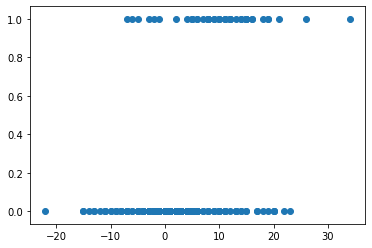

In [38]:
from scipy.stats import pearsonr
plt.scatter(X['Diff_BL_1yr'],Y)
#np.array(Y['Class'].values)
#pearsonr(X['DiffBulbar'].values,Y['Class'].values)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 217
Data columns (total 90 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PATNO                         209 non-null    int64  
 1   BMI_x                         209 non-null    float64
 2   SYSSUP_x                      209 non-null    float64
 3   HRSUP_x                       209 non-null    float64
 4   age                           209 non-null    float64
 5   gen                           209 non-null    int64  
 6   EDUCYRS                       209 non-null    int64  
 7   ageonset                      209 non-null    float64
 8   agediag                       209 non-null    float64
 9   DOMSIDE                       209 non-null    float64
 10  Cognitive_x                   209 non-null    float64
 11  Sleep_x                       209 non-null    float64
 12  Autonomic_Nervous_System_x    209 non-null    float64
 13  Bulba

In [40]:
X[X['gen']==2]['age'].mean()

59.93979014084506

In [41]:
#X=X.iloc[:,np.r_[1:39,91:117,142:169]]
#X=X.iloc[:,np.r_[1:36,91:118,144:170]]
X=X.iloc[:,np.r_[1:38,64:90]]
X.info()
#Y

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 217
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BMI_x                         209 non-null    float64
 1   SYSSUP_x                      209 non-null    float64
 2   HRSUP_x                       209 non-null    float64
 3   age                           209 non-null    float64
 4   gen                           209 non-null    int64  
 5   EDUCYRS                       209 non-null    int64  
 6   ageonset                      209 non-null    float64
 7   agediag                       209 non-null    float64
 8   DOMSIDE                       209 non-null    float64
 9   Cognitive_x                   209 non-null    float64
 10  Sleep_x                       209 non-null    float64
 11  Autonomic_Nervous_System_x    209 non-null    float64
 12  Bulbar_x                      209 non-null    float64
 13  Commo

In [42]:
a=[1,2,5,8]
b=[1,2,3,1]
from scipy.stats import spearmanr
spearmanr(a,b)

SpearmanrResult(correlation=0.10540925533894598, pvalue=0.894590744661054)

age ageonset 0.9894947089062477
age agediag 0.9981985108305108
ageonset agediag 0.9908492702682453
Axial_Sub_1_x Axial_Sub_2 0.8835161885754155
Limb_Brady_Sub Append_Sub_x 0.828603203695792
Tremor_Sub_x Rest_Tremor_Sub 0.8577261673323519
Diff_BL_1yr DiffAppend_Sub 0.9576646099208826


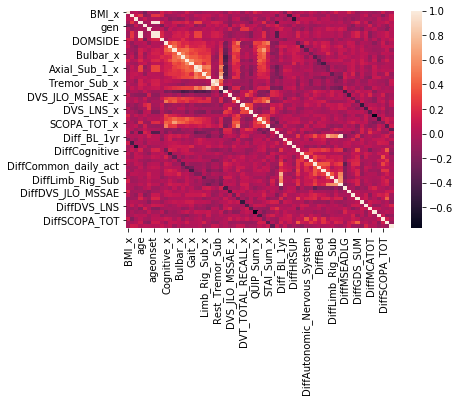

In [43]:
ind=X[X.isna().any(axis=1)].index
X=X.drop(index=ind).reset_index().drop(columns='index')
Y=Y.drop(index=ind).reset_index().drop(columns='index')


    
#Standardization

for col in X.columns:
    if col=='gen' or col=='DOMSIDE':
        continue
    else:
        X[col]=(X[col]-X[col].mean())/X[col].std()
        
#Correlation analysis
corr=X.corr('spearman').abs()
sns.heatmap(X.corr())
plt.savefig('heat_1yr')
feat=list(X.columns)
drop=[]
for i in range(len(corr)):
    for j in range(i+1,len(corr)):
            if np.abs(corr.iloc[i,j]) >0.8:
                print(feat[i],feat[j],corr.iloc[i,j])
                drop.append(feat[i])
                drop.append(feat[j])
drop=list(dict.fromkeys(drop))
keep=['age','Axial_Sub_1_x','Append_Sub_x','Tremor_Sub_x','Diff_BL_1yr']
drop=list(set(drop)-set(keep))
X=X.drop(columns=drop)




In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BMI_x                         209 non-null    float64
 1   SYSSUP_x                      209 non-null    float64
 2   HRSUP_x                       209 non-null    float64
 3   age                           209 non-null    float64
 4   gen                           209 non-null    int64  
 5   EDUCYRS                       209 non-null    float64
 6   DOMSIDE                       209 non-null    float64
 7   Cognitive_x                   209 non-null    float64
 8   Sleep_x                       209 non-null    float64
 9   Autonomic_Nervous_System_x    209 non-null    float64
 10  Bulbar_x                      209 non-null    float64
 11  Common_daily_act_x            209 non-null    float64
 12  Bed_x                         209 non-null    float64
 13  Gait_

In [45]:
len(Y[Y['Class']==1])

47

In [46]:
l=[i for i in range(57)]
l.remove(0)
l.remove(3)
print(l)

[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,stratify=Y,shuffle=True)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score,confusion_matrix,precision_score,balanced_accuracy_score,recall_score,accuracy_score,roc_auc_score
from sklearn.metrics import brier_score_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,RFE,SelectFpr,chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold,LeaveOneOut
from sklearn.feature_selection import mutual_info_classif,GenericUnivariateSelect
from imblearn.over_sampling import SMOTENC,BorderlineSMOTE,ADASYN,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import mannwhitneyu,kruskal,f_oneway

In [49]:
warnings.filterwarnings('ignore')

In [105]:
models=[RandomForestClassifier(n_estimators=10,n_jobs=-1,bootstrap=True,class_weight='balanced_subsample'),
       GaussianNB(),LogisticRegression(class_weight='balanced'),DummyClassifier(strategy='most_frequent'),
        SGDClassifier('log',learning_rate='adaptive',eta0=0.01,class_weight='balanced'), DecisionTreeClassifier(class_weight='balanced'),
        AdaBoostClassifier(n_estimators=10),GradientBoostingClassifier(n_estimators=10)]

model_names=['RF','GNB','LOG_Reg','Dummy','SGDClass','DecTree','ADA','GBC']



In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=0,shuffle=True)
models=[LogisticRegression(class_weight='balanced')]

model_names=['LOG_Reg']

n_feat=[3,6,8,10]

for f in n_feat:
    print('\nN Feat:',f)
    for model,model_name in zip(models,model_names):
        acc,f1,p,r,accb,roc = [],[],[],[],[],[]
        y_p=[]
        y_t=[]
        print(model_name)
        loo=LeaveOneOut()
        feat={key:0 for key in X.columns}
        for train_index, test_index in loo.split(X_train, y_train):
            X_train_K, X_test_K = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
            y_train_K, y_test_K = y_train.iloc[train_index,:], y_train.iloc[test_index,:]
            # select best features on training 

            rank={key:0 for key in X_train.columns}
            for j in X_train.columns:
                rank[j]=mannwhitneyu(X_train_K[y_train_K['Class']==0][j],X_train_K[y_train_K['Class']==1][j])[1]

            rank={k: v for k, v in sorted(rank.items(), key=lambda item: item[1],reverse=False)}  
            support=list(rank.keys())[0:f]
            
            #selector=RFE(LogisticRegression(class_weight='balanced'),f)
            #selector=selector.fit(X_train_K,y_train_K)
            #support=selector.support_
            for j in X_train_K.loc[:,support].columns.to_list():
                feat[j]+=1
            #keep only selected features
            X_train_K = X_train_K.loc[:,support]
            X_test_K = X_test_K.loc[:,support]
            
            oversample=SMOTE(sampling_strategy=1,k_neighbors=5,random_state=0)
            under=RandomUnderSampler(0.5,random_state=1)
            #X_train_K,y_train_K=under.fit_resample(X_train_K, y_train_K)
            #X_train_K, y_train_K = oversample.fit_resample(X_train_K, y_train_K)



            model = model.fit(X_train_K,y_train_K.values.ravel())

            y_pred = model.predict(X_test_K)
            y_p.append(np.asscalar(y_pred))
            y_t.append(np.asscalar(y_test_K.values))
            
            #acc.append(accuracy_score(y_test_K,y_pred))
            #f1.append(f1_score(y_test_K,y_pred))
            #p.append(precision_score(y_test_K,y_pred))
            #r.append(recall_score(y_test_K,y_pred))
            #accb.append(balanced_accuracy_score(y_test_K,y_pred))
            #try:
            #    roc.append(roc_auc_score(y_test_K,y_pred))
            #except:
            #    roc.append(np.nan)
        print('TRAIN')
        feat={k: v for k, v in sorted(feat.items(), key=lambda item: item[1],reverse=True)}
        print(feat)
        print(accuracy_score(y_t,y_p))
        print(f1_score(y_t,y_p))
        print(precision_score(y_t,y_p))
        print(recall_score(y_t,y_p))
        print(balanced_accuracy_score(y_t,y_p))
        print(roc_auc_score(y_t,y_p))
        print(confusion_matrix(y_t,y_p))
        
        X_train_ov=X_train.loc[:,list(feat.keys())[0:f]]
        X_test_ov=X_test.loc[:,list(feat.keys())[0:f]]
        
        X_train_ov,y_train_ov=under.fit_resample(X_train_ov, y_train)
        X_train_ov, y_train_ov = oversample.fit_resample(X_train_ov, y_train_ov)
        
        model=model.fit(X_train_ov,y_train_ov)
        y_pred=model.predict(X_test_ov)
        
        print('TEST')
        print(accuracy_score(y_test,y_pred))
        print(f1_score(y_test,y_pred))
        print(precision_score(y_test,y_pred))
        print(recall_score(y_test,y_pred))
        print(balanced_accuracy_score(y_test,y_pred))
        print(roc_auc_score(y_test,y_pred))
        print(confusion_matrix(y_test,y_pred))
        
        #print('Acc mean',np.mean(acc))    
        #print('F1 mean',np.mean(f1))
        #print('Precision mean',np.mean(p))
        #print('Recall mean',np.mean(r))
        #print('Balance Acc mean',np.mean(accb))
        #try:
        #    print('Roc AUC:',np.mean(roc))
        #except:
        #    print('ROC AUC: Nan')
        #print('\n')


N Feat: 3
LOG_Reg
TRAIN
{'Diff_BL_1yr': 188, 'DiffLimb_Rig_Sub': 177, 'DiffBulbar': 103, 'DiffCommon_daily_act': 59, 'DiffTremor_Sub': 37, 'BMI_x': 0, 'SYSSUP_x': 0, 'HRSUP_x': 0, 'age': 0, 'gen': 0, 'EDUCYRS': 0, 'DOMSIDE': 0, 'Cognitive_x': 0, 'Sleep_x': 0, 'Autonomic_Nervous_System_x': 0, 'Bulbar_x': 0, 'Common_daily_act_x': 0, 'Bed_x': 0, 'Gait_x': 0, 'Axial_Sub_1_x': 0, 'Limb_Rig_Sub_x': 0, 'Tremor_Sub_x': 0, 'Append_Sub_x': 0, 'MSEADLG_x': 0, 'DVS_JLO_MSSAE_x': 0, 'Epworth_SUM_x': 0, 'GDS_SUM_x': 0, 'DVT_TOTAL_RECALL_x': 0, 'DVS_LNS_x': 0, 'MCATOT_x': 0, 'REM_Sum_x': 0, 'SCOPA_TOT_x': 0, 'STAI_Sum_x': 0, 'DVT_SDM_x': 0, 'UPSIT_Sum': 0, 'DiffBMI': 0, 'DiffSYSSUP': 0, 'DiffHRSUP': 0, 'DiffCognitive': 0, 'DiffSleep': 0, 'DiffAutonomic_Nervous_System': 0, 'DiffBed': 0, 'DiffGait': 0, 'DiffMSEADLG': 0, 'DiffDVS_JLO_MSSAE': 0, 'DiffEpworth_SUM': 0, 'DiffGDS_SUM': 0, 'DiffDVT_TOTAL_RECALL': 0, 'DiffDVS_LNS': 0, 'DiffMCATOT': 0, 'DiffREM_Sum': 0, 'DiffSCOPA_TOT': 0, 'DiffSTAI_Sum': 0, '

KeyboardInterrupt: 

In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor



# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

def feature_selection(n,X,y):
    
    colnames = list(X.columns)

    # Construct our Linear Regression model
    #lr = LinearRegression()
    #lr.fit(X,y.values.ravel())
    
    #stop the search when only the last feature is left
    #rfe = RFE(lr, n_features_to_select=1, verbose =3 )
    #rfe.fit(X,y.values.ravel())
    #ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

    # Using Linear Regression
    #lr = LinearRegression()
    #lr.fit(X,y.values.ravel())
    #ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

    # Using Ridge 
    ridge = Ridge(alpha = 7)
    ridge.fit(X_train_K,y_train_K.values.ravel())
    ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

    # Using Lasso
    lasso = Lasso(alpha=.05)
    lasso.fit(X, y.values.ravel())
    ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)
    
    # Random Forest
    rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=0)
    rf.fit(X,y.values.ravel())
    ranks["RF"] = ranking(rf.feature_importances_, colnames)

    # Create empty dictionary to store the mean value calculated from all the scores
    r = {}
    for name in colnames:
        r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)

    methods = sorted(ranks.keys())
    ranks["Mean"] = r
    methods.append("Mean")

    #print("\t%s" % "\t".join(methods))
    #for name in colnames:
        #print("%s\t%s" % (name, "\t".join(map(str, 
                             #[ranks[method][name] for method in methods]))))

    # Put the mean scores into a Pandas dataframe
    meanplot = pd.DataFrame(list(ranks["Lasso"].items()), columns= ['Feature','Ranking'])

    # Sort the dataframe
    meanplot = meanplot.sort_values('Ranking', ascending=False)

    # Let's plot the ranking of the features
    sns.factorplot(x="Ranking", y="Feature", data = meanplot, kind="bar", 
                   size=14, aspect=1.9, palette='coolwarm')
    #print(meanplot)
    feat = list(meanplot.iloc[:n,0].values)
    return feat


N Feat: 1
TEST
['Diff_BL_1yr']
[[13  3]
 [ 1  4]]
TEST
['Diff_BL_1yr']
[[10  6]
 [ 0  5]]
TEST
['Diff_BL_1yr']
[[11  5]
 [ 0  5]]
TEST
['Diff_BL_1yr']
[[ 4 12]
 [ 0  5]]
TEST
['Diff_BL_1yr']
[[13  3]
 [ 2  3]]
TEST
['Diff_BL_1yr']
[[10  6]
 [ 0  5]]
TEST
['Diff_BL_1yr']
[[12  4]
 [ 2  3]]
TEST
['Diff_BL_1yr']
[[13  4]
 [ 1  3]]
TEST
['Diff_BL_1yr']
[[12  5]
 [ 1  3]]
TEST
['Diff_BL_1yr']
[[11  5]
 [ 1  3]]
Acc: 0.7080952380952381 $\pm$ 0.09865420954639742
F1 mean 0.5628787878787879
Precision mean 0.43817799847211614
Recall mean 0.825
Balance Acc mean 0.748529411764706
Roc AUC: 0.781452205882353
PR AUC: 0.525182310336722
Brier 0.29
MCC 0.43


{'Diff_BL_1yr': 100, 'BMI_x': 0, 'SYSSUP_x': 0, 'HRSUP_x': 0, 'age': 0, 'gen': 0, 'EDUCYRS': 0, 'DOMSIDE': 0, 'Cognitive_x': 0, 'Sleep_x': 0, 'Autonomic_Nervous_System_x': 0, 'Bulbar_x': 0, 'Common_daily_act_x': 0, 'Bed_x': 0, 'Gait_x': 0, 'Axial_Sub_1_x': 0, 'Limb_Rig_Sub_x': 0, 'Tremor_Sub_x': 0, 'Append_Sub_x': 0, 'MSEADLG_x': 0, 'DVS_JLO_MSSAE

TEST
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffCommon_daily_act', 'DiffBulbar']
[[ 6 10]
 [ 0  5]]
TEST
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffBulbar', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act']
[[14  2]
 [ 2  3]]
TEST
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffLimb_Rig_Sub', 'DiffTremor_Sub', 'DiffBulbar']
[[12  4]
 [ 0  5]]
TEST
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffCommon_daily_act', 'DiffLimb_Rig_Sub']
[[10  6]
 [ 2  3]]
TEST
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffLimb_Rig_Sub', 'DiffTremor_Sub', 'DiffBulbar']
[[13  4]
 [ 1  3]]
TEST
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffLimb_Rig_Sub', 'DiffTremor_Sub', 'DiffCommon_daily_act']
[[11  6]
 [ 1  3]]
TEST
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffLimb_Rig_Sub', 'DiffTremor_Sub', 'DiffCommon_daily_act']
[[12  4]
 [ 1  3]]
Acc: 0.7273809523809525 $\pm$ 0.09258966359690837
F1 mean 0.5676257076257076
Precision mean 0.4568253968253968
Recall mean 0.7849999999999999
Balance Acc mean 0.7474632352941176
Roc A

TEST
['Diff_BL_1yr', 'DiffBulbar', 'DiffAxial_Sub_1', 'DiffLimb_Rig_Sub', 'DiffTremor_Sub', 'DiffCommon_daily_act', 'BMI_x', 'Cognitive_x']
[[12  4]
 [ 1  4]]
TEST
['Diff_BL_1yr', 'DiffCommon_daily_act', 'DiffAxial_Sub_1', 'DiffLimb_Rig_Sub', 'DiffTremor_Sub', 'DiffGait', 'DiffBulbar', 'DiffEpworth_SUM']
[[9 7]
 [2 3]]
TEST
['Diff_BL_1yr', 'DiffBulbar', 'DiffCommon_daily_act', 'DiffAxial_Sub_1', 'DiffLimb_Rig_Sub', 'DiffTremor_Sub', 'BMI_x', 'DiffGait']
[[12  5]
 [ 1  3]]
TEST
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffLimb_Rig_Sub', 'DiffTremor_Sub', 'DiffBulbar', 'DiffCommon_daily_act', 'DiffGait', 'Append_Sub_x']
[[13  4]
 [ 2  2]]
TEST
['BMI_x', 'Diff_BL_1yr', 'DiffBulbar', 'DiffCommon_daily_act', 'DiffAxial_Sub_1', 'DiffLimb_Rig_Sub', 'DiffTremor_Sub', 'Cognitive_x']
[[12  4]
 [ 1  3]]
Acc: 0.7083333333333333 $\pm$ 0.1003466214899358
F1 mean 0.4995471195471195
Precision mean 0.47702380952380946
Recall mean 0.66
Balance Acc mean 0.6910294117647059
Roc AUC: 0.7871139705882353
PR AUC: 0

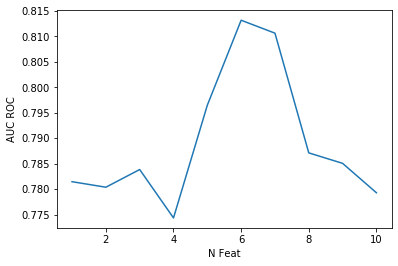

In [50]:
from sklearn.metrics import *
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1,shuffle=True)
model=LogisticRegression(penalty='none')
#model=DummyClassifier('most_frequent')
from sklearn.linear_model import Lasso,RidgeClassifier,ElasticNet
#model=ElasticNet()
#model=GaussianNB()
#model=RandomForestClassifier(n_estimators=100,n_jobs=-1,bootstrap=True,class_weight='balanced_subsample')
#model=SGDClassifier('log',learning_rate='adaptive',eta0=0.005,class_weight='balanced')
#model=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
#model=GradientBoostingClassifier(n_estimators=100)
n_feat=[1,2,3,4,5,6,7,8,9,10]
fin_roc=[]
#X=X.drop(columns=['Diff_BL_1yr'])
for f in n_feat:
    print('\nN Feat:',f)
    
    skf=StratifiedKFold(n_splits=10,random_state=4,shuffle=True)
    skf1=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    loo=LeaveOneOut()
    acc,f1,p,r,accb,roc,brier,mcc,lr_auc = [],[],[],[],[],[],[],[],[]
    tot_feat={key:0 for key in X.columns}    
    for train_index, test_index in skf1.split(X, Y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]
        y_p=[]
        y_t=[]
        feat={key:0 for key in X.columns}
        for train_index, test_index in skf.split(X_train, y_train):
            X_train_K, X_test_K = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
            y_train_K, y_test_K = y_train.iloc[train_index,:], y_train.iloc[test_index,:]


            ###VARIABLE RANKING
            rank={key:0 for key in X_train.columns}
            for j in X_train.columns:
                rank[j]=mannwhitneyu(X_train_K[y_train_K['Class']==0][j],X_train_K[y_train_K['Class']==1][j])[1]
            rank={k: v for k, v in sorted(rank.items(), key=lambda item: item[1],reverse=False)}  
            support=list(rank.keys())[0:f]
            
            #selector=RFE(LogisticRegression(class_weight='balanced'),f)
            #selector=selector.fit(X_train_K,y_train_K.values.ravel())
            #support=selector.support_
            #support=feature_selection(f,X_train_K,y_train_K)
            

            ###INCREMENT FEATURE COUNTER
            for j in X_train_K.loc[:,support].columns.to_list():
                feat[j]+=1
                tot_feat[j]+=1

            ###SELECT BEST N FEAT
            X_train_K = X_train_K.loc[:,support]
            #X_test_K = X_test_K.loc[:,support]


            ###SMOTE
            under=RandomUnderSampler(0.5,random_state=0)
            #oversample=SMOTE(sampling_strategy=1,k_neighbors=3,random_state=0)
            #oversample=ADASYN(1,random_state=0)
            #oversample=BorderlineSMOTE(1,k_neighbors=5,random_state=0)
            oversample=SMOTENC(sampling_strategy=1,categorical_features=[i for i in range(f)],k_neighbors=10,random_state=10)
            #X_train_K,y_train_K=under.fit_resample(X_train_K,y_train_K)
            #X_train_K, y_train_K = oversample.fit_resample(X_train_K, y_train_K)



            #model = model.fit(X_train_K,y_train_K.values.ravel())

            #y_pred = model.predict(X_test_K)
            #y_p.append(np.asscalar(y_pred))
            #y_t.append(np.asscalar(y_test_K.values))


        #print('TRAIN')
        #print(accuracy_score(y_t,y_p))
        #print(f1_score(y_t,y_p))
        #print(precision_score(y_t,y_p))
        #print(recall_score(y_t,y_p))
        #print(balanced_accuracy_score(y_t,y_p))
        #print(roc_auc_score(y_t,y_p))
        


        print('TEST')
        tot_feat={k: v for k, v in sorted(tot_feat.items(), key=lambda item: item[1],reverse=True)}
        feat={k: v for k, v in sorted(feat.items(), key=lambda item: item[1],reverse=True)}
        print(list(feat.keys())[0:f])

        X_train_ov=X_train.loc[:,list(feat.keys())[0:f]]
        X_test_ov=X_test.loc[:,list(feat.keys())[0:f]]

        
        X_train_ov,y_train_ov=under.fit_resample(X_train_ov, y_train)
        

        X_train_ov['temp']=0
        X_train_ov, y_train_ov = oversample.fit_resample(X_train_ov, y_train_ov)
        X_train_ov=X_train_ov.drop(columns=['temp'])
        
        model=model.fit(X_train_ov,y_train_ov.values.ravel())
        
        y_pred=model.predict(X_test_ov)
        y_prob=model.predict_proba(X_test_ov)[:,1]


        acc.append(accuracy_score(y_test,y_pred))
        f1.append(f1_score(y_test,y_pred))
        p.append(precision_score(y_test,y_pred))
        r.append(recall_score(y_test,y_pred))
        accb.append(balanced_accuracy_score(y_test,y_pred))
        roc.append(roc_auc_score(y_test,y_prob))
        brier.append(brier_score_loss(y_test,y_pred))
        mcc.append(matthews_corrcoef(y_test,y_pred))
        lr_precision, lr_recall, thr = precision_recall_curve(y_test, y_prob)
        lr_auc.append(auc(lr_recall, lr_precision))
        print(confusion_matrix(y_test,y_pred))
    print('Acc:',np.mean(acc),'$\\pm$',np.std(acc))    
    print('F1 mean',np.mean(f1))
    print('Precision mean',np.mean(p))
    print('Recall mean',np.mean(r))
    print('Balance Acc mean',np.mean(accb))
    try:
        print('Roc AUC:',np.mean(roc))
        print('PR AUC:',np.mean(lr_auc))
        fin_roc.append(np.mean(roc))
    except:
        print('ROC AUC: Nan')
    print('Brier',round(np.mean(brier),2))
    print('MCC',round(np.mean(mcc),2))
    print('\n')
    tot_feat={k: v for k, v in sorted(tot_feat.items(), key=lambda item: item[1],reverse=True)}
    print(tot_feat)
    
    
    
    
plt.xlabel('N Feat')
plt.ylabel('AUC ROC')
plt.plot(n_feat,fin_roc)

In [70]:
from sklearn.metrics import *
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1,shuffle=True)
model=LogisticRegression(penalty='none')
#model=DummyClassifier('most_frequent')
from sklearn.linear_model import Lasso,RidgeClassifier,ElasticNet
#model=ElasticNet()
#model=GaussianNB()
#model=RandomForestClassifier(n_estimators=100,n_jobs=-1,bootstrap=True,class_weight='balanced_subsample')
#model=SGDClassifier('log',learning_rate='adaptive',eta0=0.005,class_weight='balanced')
#model=DecisionTreeClassifier(class_weight='balanced',max_depth=5)
#model=GradientBoostingClassifier(n_estimators=100)
n_feat=[1,2,3,4,5,6,7,8,9,10]
fin_roc=[]
#X=X.drop(columns=['Diff_BL_1yr'])
skf=StratifiedKFold(n_splits=10,random_state=4,shuffle=True)
skf1=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
loo=LeaveOneOut()
acc,f1,p,r,accb,roc,brier,mcc,lr_auc = [],[],[],[],[],[],[],[],[]
tot_feat={key:0 for key in X.columns}
pippo=[]
f=6
for train_index, test_index in skf1.split(X, Y):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]
    y_p=[]
    y_t=[]
    pluto=[]
    feat={key:0 for key in X.columns}
    for train_index, test_index in skf.split(X_train, y_train):
        X_train_K, X_test_K = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_K, y_test_K = y_train.iloc[train_index,:], y_train.iloc[test_index,:]


        ###VARIABLE RANKING
        rank={key:0 for key in X_train.columns}
        for j in X_train.columns:
            rank[j]=mannwhitneyu(X_train_K[y_train_K['Class']==0][j],X_train_K[y_train_K['Class']==1][j])[1]
        rank={k: v for k, v in sorted(rank.items(), key=lambda item: item[1],reverse=False)}  
        support=list(rank.keys())[0:f]

        #selector=RFE(LogisticRegression(class_weight='balanced'),f)
        #selector=selector.fit(X_train_K,y_train_K.values.ravel())
        #support=selector.support_
        #support=feature_selection(f,X_train_K,y_train_K)


        ###INCREMENT FEATURE COUNTER
        for j in X_train_K.loc[:,support].columns.to_list():
            feat[j]+=1
            tot_feat[j]+=1

        ###SELECT BEST N FEAT
        X_train_a = X_train_K.loc[:,support]
        X_test_a = X_test_K.loc[:,support]


        ###SMOTE
        under=RandomUnderSampler(0.5,random_state=0)
        #oversample=SMOTE(sampling_strategy=1,k_neighbors=3,random_state=0)
        #oversample=ADASYN(1,random_state=0)
        #oversample=BorderlineSMOTE(1,k_neighbors=5,random_state=0)
        oversample=SMOTENC(sampling_strategy=1,categorical_features=[i for i in range(f)],k_neighbors=10,random_state=10)
        X_train_a,y_train_a=under.fit_resample(X_train_a,y_train_K)
        X_train_a['temp']=0
        X_train_a, y_train_a = oversample.fit_resample(X_train_a, y_train_a)
        X_train_a=X_train_a.drop(columns=['temp'])



        model = model.fit(X_train_a,y_train_a.values.ravel())

        y_pred = model.predict_proba(X_test_a)[:,1]
        pluto.append(roc_auc_score(y_test_K,y_pred))
        #y_p.append(np.asscalar(y_pred))
        #y_t.append(np.asscalar(y_test_K.values))

    pippo.append(np.mean(pluto))
    #print('TRAIN')
    #print(accuracy_score(y_t,y_p))
    #print(f1_score(y_t,y_p))
    #print(precision_score(y_t,y_p))
    #print(recall_score(y_t,y_p))
    #print(balanced_accuracy_score(y_t,y_p))
    #print(roc_auc_score(y_t,y_p))


    print('TEST')
    tot_feat={k: v for k, v in sorted(tot_feat.items(), key=lambda item: item[1],reverse=True)}
    feat={k: v for k, v in sorted(feat.items(), key=lambda item: item[1],reverse=True)}
    print(list(feat.keys())[0:f])

    X_train_ov=X_train.loc[:,list(feat.keys())[0:f]]
    X_test_ov=X_test.loc[:,list(feat.keys())[0:f]]


    X_train_ov,y_train_ov=under.fit_resample(X_train_ov, y_train)


    X_train_ov['temp']=0
    X_train_ov, y_train_ov = oversample.fit_resample(X_train_ov, y_train_ov)
    X_train_ov=X_train_ov.drop(columns=['temp'])

    model=model.fit(X_train_ov,y_train_ov.values.ravel())

    y_pred=model.predict(X_test_ov)
    y_prob=model.predict_proba(X_test_ov)[:,1]


    acc.append(accuracy_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))
    p.append(precision_score(y_test,y_pred))
    r.append(recall_score(y_test,y_pred))
    accb.append(balanced_accuracy_score(y_test,y_pred))
    roc.append(roc_auc_score(y_test,y_prob))
    brier.append(brier_score_loss(y_test,y_pred))
    mcc.append(matthews_corrcoef(y_test,y_pred))
    lr_precision, lr_recall, thr = precision_recall_curve(y_test, y_prob)
    lr_auc.append(auc(lr_recall, lr_precision))
    print(confusion_matrix(y_test,y_pred))
print('Acc:',np.mean(acc),'$\\pm$',np.std(acc))    
print('F1 mean',np.mean(f1))
print('Precision mean',np.mean(p))
print('Recall mean',np.mean(r))
print('Balance Acc mean',np.mean(accb))
try:
    print('Roc AUC:',np.mean(roc))
    print('PR AUC:',np.mean(lr_auc))
    fin_roc.append(np.mean(roc))
except:
    print('ROC AUC: Nan')
print('Brier',round(np.mean(brier),2))
print('MCC',round(np.mean(mcc),2))
print('\n')
tot_feat={k: v for k, v in sorted(tot_feat.items(), key=lambda item: item[1],reverse=True)}
print(tot_feat)


    
    
plt.xlabel('N Feat')
plt.ylabel('AUC ROC')
#plt.plot(n_feat,fin_roc)

0.7430714285714286


In [52]:
from sklearn.metrics import *
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1,shuffle=True)
model=LogisticRegression(class_weight='balanced')
from sklearn.linear_model import Lasso,RidgeClassifier,ElasticNet
#model=ElasticNet()
#model=GaussianNB()
#model=RandomForestClassifier(n_estimators=10,n_jobs=-1,bootstrap=True,class_weight='balanced_subsample')
#model=SGDClassifier('log',learning_rate='adaptive',eta0=0.005,class_weight='balanced')
#model=DecisionTreeClassifier(class_weight='balanced')
n_feat=[1,2,3,4,5,6,7,8,9,10]
fin_roc=[]
#X=X.drop(columns=['Diff_BL_1yr'])
for f in n_feat:
    print('\nN Feat:',f)
    
    skf=StratifiedKFold(n_splits=10,random_state=4,shuffle=True)
    skf1=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    loo=LeaveOneOut()
    acc,f1,p,r,accb,roc,brier,mcc = [],[],[],[],[],[],[],[]
    tot_feat={key:0 for key in X.columns}    
    for train_index, test_index in skf1.split(X, Y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = Y.iloc[train_index,:], Y.iloc[test_index,:]
        y_p=[]
        y_t=[]
        feat={key:0 for key in X.columns}
        roc_val=0
        for train_index, test_index in skf.split(X_train, y_train):
            X_train_K, X_test_K = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
            y_train_K, y_test_K = y_train.iloc[train_index,:], y_train.iloc[test_index,:]


            ###VARIABLE RANKING
            rank={key:0 for key in X_train.columns}
            for j in X_train.columns:
                rank[j]=mannwhitneyu(X_train_K[y_train_K['Class']==0][j],X_train_K[y_train_K['Class']==1][j])[1]
            rank={k: v for k, v in sorted(rank.items(), key=lambda item: item[1],reverse=False)}  
            support=list(rank.keys())[0:f]
            
            #selector=RFE(LogisticRegression(class_weight='balanced'),f)
            #selector=selector.fit(X_train_K,y_train_K.values.ravel())
            #support=selector.support_
            #support=feature_selection(f,X_train_K,y_train_K)
            

            ###INCREMENT FEATURE COUNTER
            #for j in X_train_K.loc[:,support].columns.to_list():
            #    feat[j]+=1
            #    tot_feat[j]+=1

            ###SELECT BEST N FEAT
            X_train_K = X_train_K.loc[:,support]
            X_test_K = X_test_K.loc[:,support]


            ###SMOTE
            under=RandomUnderSampler(0.5,random_state=0)
            #oversample=SMOTE(sampling_strategy=1,k_neighbors=3,random_state=0)
            #oversample=ADASYN(1,random_state=0)
            #oversample=BorderlineSMOTE(1,k_neighbors=5,random_state=0)
            oversample=SMOTENC(sampling_strategy=1,categorical_features=[i for i in range(f)],k_neighbors=10,random_state=10)
            X_train_K,y_train_K=under.fit_resample(X_train_K,y_train_K)
            
            X_train_K['temp']=0
            X_train_K, y_train_K = oversample.fit_resample(X_train_K, y_train_K)
            X_train_K=X_train_K.drop(columns=['temp'])
            model = model.fit(X_train_K,y_train_K.values.ravel())

            y_pr_val = model.predict_proba(X_test_K)[:,1]
            if roc_auc_score(y_test_K,y_pr_val) > roc_val:
                roc_val=roc_auc_score(y_test_K,y_pr_val)
                best=X_train_K.loc[:,support].columns.to_list()
            #y_p.append(np.asscalar(y_pred))
            #y_t.append(np.asscalar(y_test_K.values))


        #print('TRAIN')
        #print(accuracy_score(y_t,y_p))
        #print(f1_score(y_t,y_p))
        #print(precision_score(y_t,y_p))
        #print(recall_score(y_t,y_p))
        #print(balanced_accuracy_score(y_t,y_p))
        #print(roc_auc_score(y_t,y_p))
        


        print('TEST')
        for j in X_train.loc[:,best].columns.to_list():
            tot_feat[j]+=1
        tot_feat={k: v for k, v in sorted(tot_feat.items(), key=lambda item: item[1],reverse=True)}
        print(best)
        #feat={k: v for k, v in sorted(feat.items(), key=lambda item: item[1],reverse=True)}
        #print(list(feat.keys())[0:f])

        #X_train_ov=X_train.loc[:,list(feat.keys())[0:f]]
        #X_test_ov=X_test.loc[:,list(feat.keys())[0:f]]
        X_train_ov=X_train.loc[:,best]
        X_test_ov=X_test.loc[:,best]
        
        X_train_ov,y_train_ov=under.fit_resample(X_train_ov, y_train)
        

        X_train_ov['temp']=0
        X_train_ov, y_train_ov = oversample.fit_resample(X_train_ov, y_train_ov)
        X_train_ov=X_train_ov.drop(columns=['temp'])
        
        model=model.fit(X_train_ov,y_train_ov.values.ravel())
        
        y_pred=model.predict(X_test_ov)
        y_prob=model.predict_proba(X_test_ov)[:,1]

        acc.append(accuracy_score(y_test,y_pred))
        f1.append(f1_score(y_test,y_pred))
        p.append(precision_score(y_test,y_pred))
        r.append(recall_score(y_test,y_pred))
        accb.append(balanced_accuracy_score(y_test,y_pred))
        roc.append(roc_auc_score(y_test,y_prob))
        brier.append(brier_score_loss(y_test,y_pred))
        mcc.append(matthews_corrcoef(y_test,y_pred))
        print(confusion_matrix(y_test,y_pred))
    print('Acc mean',np.mean(acc))    
    print('F1 mean',np.mean(f1))
    print('Precision mean',np.mean(p))
    print('Recall mean',np.mean(r))
    print('Balance Acc mean',np.mean(accb))
    try:
        print('Roc AUC:',np.mean(roc))
        fin_roc.append(np.mean(roc))
    except:
        print('ROC AUC: Nan')
    print('Brier',np.mean(brier))
    print('MCC',np.mean(mcc))
    print('\n')
    tot_feat={k: v for k, v in sorted(tot_feat.items(), key=lambda item: item[1],reverse=True)}
    print(tot_feat)
    
    
    
    
plt.xlabel('N Feat')
plt.ylabel('AUC ROC')
plt.plot(n_feat,fin_roc)


N Feat: 1
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]


IndexError: Boolean index has wrong length: 57 instead of 1

In [ ]:
list = [20, 30, 40, 50 ,60, 70, 80]
sampling = random.choices(list, k=4)
sampling

In [ ]:
#PCA
#ADD 2yr-1yr

In [ ]:
X.info()

['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar']
ROC 0.7784344628316259
ROC 0.7784344628316259


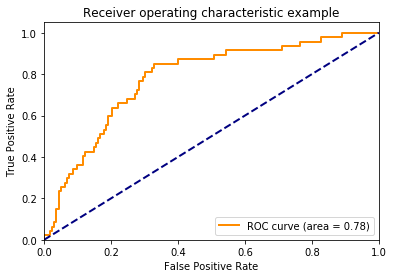



Logistic: auc=0.459


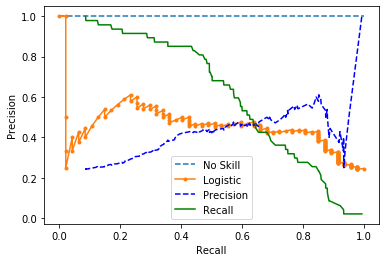

ACC 0.7177033492822966
F1 0.528
PREC 0.4230769230769231
REC 0.7021276595744681
BAL ACC 0.7121749408983451
[[117  45]
 [ 14  33]]
[0.69060146 0.19562998 0.34653553 0.085848   0.16140227 0.58873592]
[-0.40939392]
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar', 'BMI_x']
ROC 0.792093511951668
ROC 0.792093511951668


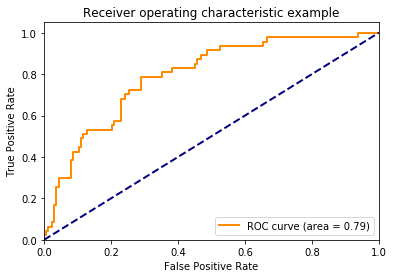



Logistic: auc=0.495


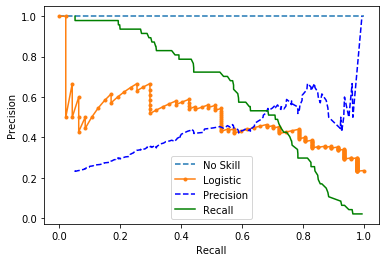

ACC 0.7368421052631579
F1 0.5528455284552847
PREC 0.4473684210526316
REC 0.723404255319149
BAL ACC 0.7320724980299449
[[120  42]
 [ 13  34]]
[0.81788705 0.19195424 0.24589333 0.05097292 0.15959794 0.55387744
 0.47662125]
[-0.478101]
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar', 'BMI_x', 'DiffEpworth_SUM']
ROC 0.792093511951668
ROC 0.792093511951668


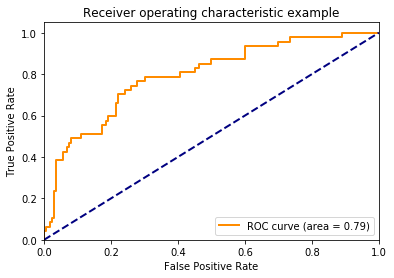



Logistic: auc=0.538


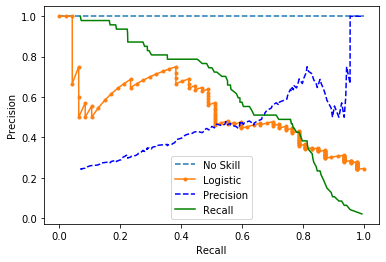

ACC 0.7416267942583732
F1 0.564516129032258
PREC 0.45454545454545453
REC 0.7446808510638298
BAL ACC 0.7427107959022852
[[120  42]
 [ 12  35]]
[0.82125258 0.1913892  0.21643322 0.08290601 0.11090589 0.50929777
 0.46067619 0.3632341 ]
[-0.5008798]
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar', 'BMI_x', 'DiffGait']
ROC 0.7882847386393486
ROC 0.7882847386393486


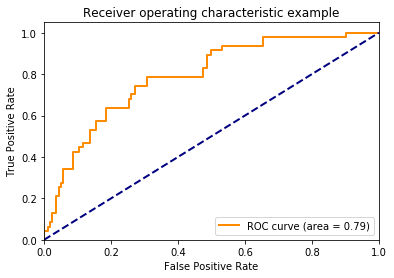



Logistic: auc=0.504


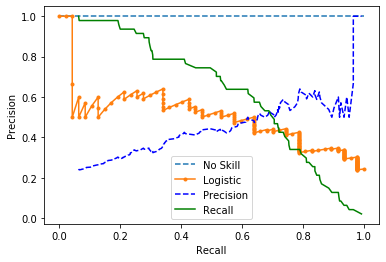

ACC 0.7272727272727273
F1 0.5439999999999999
PREC 0.4358974358974359
REC 0.723404255319149
BAL ACC 0.725899658523772
[[118  44]
 [ 13  34]]
[0.81752507 0.15994989 0.23015346 0.05670084 0.09214757 0.53314198
 0.46552773 0.24537285]
[-0.4832659]
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar', 'BMI_x', 'SCOPA_TOT_x']
ROC 0.8153401628578935
ROC 0.8153401628578935


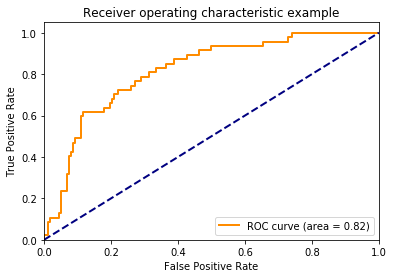



Logistic: auc=0.510


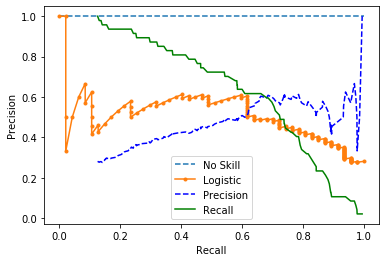

ACC 0.7464114832535885
F1 0.5619834710743802
PREC 0.4594594594594595
REC 0.723404255319149
BAL ACC 0.7382453375361178
[[122  40]
 [ 13  34]]
[0.69139589 0.26919743 0.34919195 0.15790061 0.25116275 0.49005618
 0.48717948 0.5813547 ]
[-0.56745334]
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar', 'BMI_x', 'Cognitive_x']
ROC 0.813632781717888
ROC 0.813632781717888


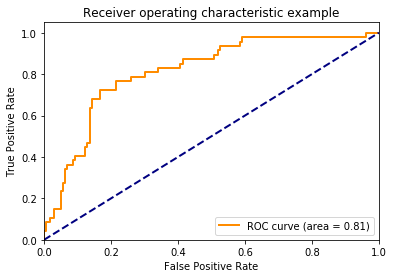



Logistic: auc=0.530


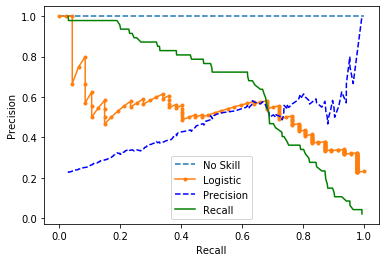

ACC 0.7751196172248804
F1 0.5982905982905983
PREC 0.5
REC 0.7446808510638298
BAL ACC 0.7643157341738902
[[127  35]
 [ 12  35]]
[0.66429118 0.14164023 0.38073628 0.30343904 0.15452512 0.55965974
 0.43590386 0.53636303]
[-0.56087528]
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar', 'BMI_x', 'gen']
ROC 0.7895981087470448
ROC 0.7895981087470448


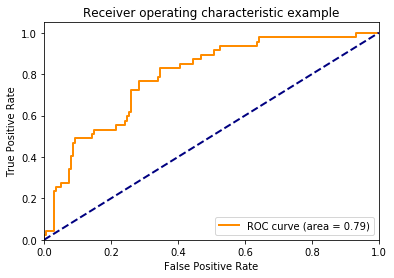



Logistic: auc=0.488


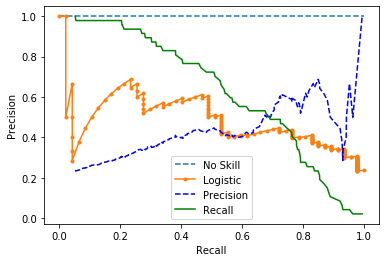

ACC 0.7320574162679426
F1 0.5483870967741935
PREC 0.44155844155844154
REC 0.723404255319149
BAL ACC 0.7289860782768585
[[119  43]
 [ 13  34]]
[ 0.82980494  0.20589836  0.25968776  0.04177392  0.13578971  0.54478908
  0.45285904 -0.27815441]
[-0.11497168]
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar', 'DiffEpworth_SUM']
ROC 0.7842132913054899
ROC 0.7842132913054899


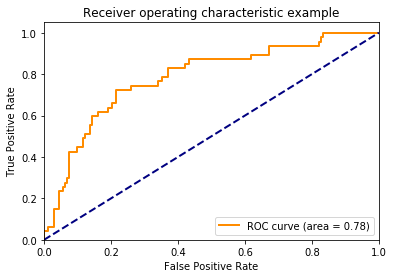



Logistic: auc=0.501


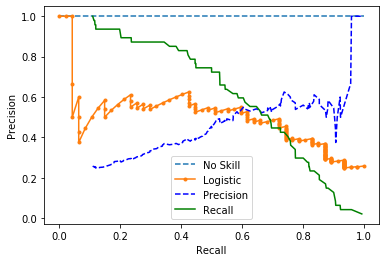

ACC 0.7416267942583732
F1 0.564516129032258
PREC 0.45454545454545453
REC 0.7446808510638298
BAL ACC 0.7427107959022852
[[120  42]
 [ 12  35]]
[0.6879969  0.21384848 0.3215543  0.12468997 0.10168976 0.54584233
 0.38665229]
[-0.44557985]
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar', 'DiffEpworth_SUM', 'DiffGait']
ROC 0.7804045179931705
ROC 0.7804045179931705


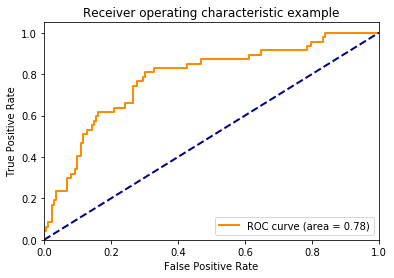



Logistic: auc=0.506


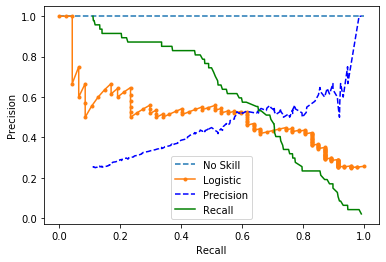

ACC 0.7368421052631579
F1 0.56
PREC 0.44871794871794873
REC 0.7446808510638298
BAL ACC 0.7396243761491988
[[119  43]
 [ 12  35]]
[0.69460932 0.17512618 0.30936395 0.12132338 0.03241895 0.54616586
 0.39295073 0.27609615]
[-0.45898103]
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar', 'DiffEpworth_SUM', 'SCOPA_TOT_x']
ROC 0.8083793012871027
ROC 0.8083793012871027


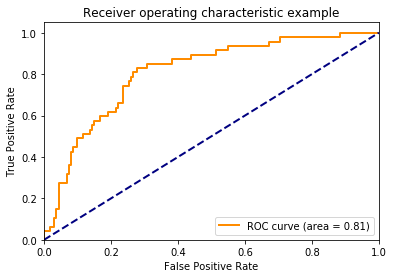



Logistic: auc=0.512


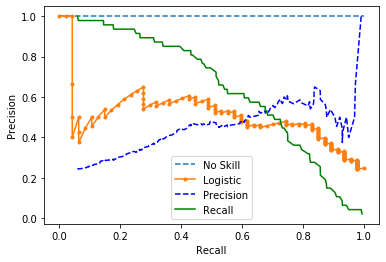

ACC 0.7559808612440191
F1 0.5714285714285714
PREC 0.4722222222222222
REC 0.723404255319149
BAL ACC 0.7444181770422905
[[124  38]
 [ 13  34]]
[0.52197402 0.31190415 0.44934847 0.23247316 0.17544685 0.50301807
 0.33279835 0.52601302]
[-0.52424636]
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar', 'DiffEpworth_SUM', 'Cognitive_x']
ROC 0.8070659311794064
ROC 0.8070659311794064


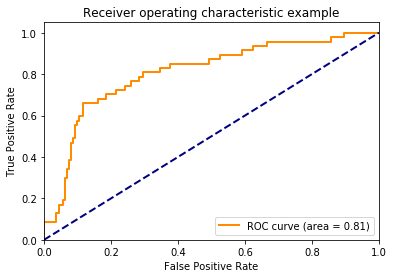



Logistic: auc=0.544


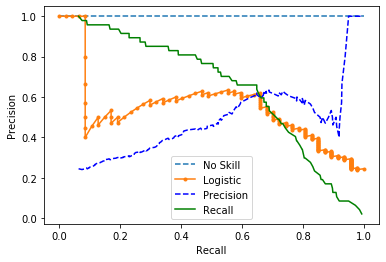

ACC 0.7464114832535885
F1 0.5760000000000001
PREC 0.46153846153846156
REC 0.7659574468085106
BAL ACC 0.7533490937746257
[[120  42]
 [ 11  36]]
[0.52642472 0.13959198 0.45454507 0.39291498 0.09922564 0.55784565
 0.36172646 0.5528036 ]
[-0.53166912]
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar', 'DiffEpworth_SUM', 'gen']
ROC 0.7764644076700815
ROC 0.7764644076700815


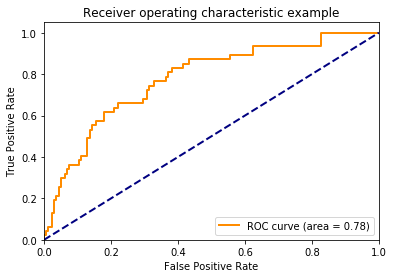



Logistic: auc=0.487


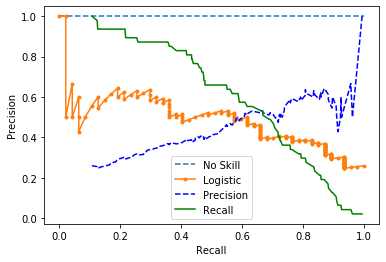

ACC 0.7081339712918661
F1 0.5040650406504065
PREC 0.40789473684210525
REC 0.6595744680851063
BAL ACC 0.6908983451536643
[[117  45]
 [ 16  31]]
[ 0.71270448  0.2276833   0.33513815  0.10914927  0.07756249  0.53508812
  0.36165341 -0.3443381 ]
[0.00538348]
['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar', 'DiffGait']


KeyboardInterrupt: 

In [51]:
loo=LeaveOneOut()
models=[LogisticRegression(class_weight='balanced')]
#models=[RandomForestClassifier(n_estimators=10,n_jobs=-1,bootstrap=True,class_weight='balanced_subsample')]
#models=[SGDClassifier('log',learning_rate='adaptive',eta0=0.005,class_weight='balanced')]
#models=[DecisionTreeClassifier(class_weight='balanced')]
#model=[Lasso()]
#model=[GaussianNB()]
model_names=['LOG']
import random
import math
roc=[]
tot_comb=[]
def ev(var):
    X_f=X.loc[:,var]
    print(list(X_f.columns))
    y_t,y_p=[],[]
    for model,model_name in zip(models,model_names):
        acc,f1,p,r,accb,roc = [],[],[],[],[],[]
        y_p=[]
        Y_prob=[]
        y_t=[]
        for train_index, test_index in loo.split(X_f, Y):
            X_train_K, X_test_K = X_f.iloc[train_index,:], X_f.iloc[test_index,:]
            y_train_K, y_test_K = Y.iloc[train_index,:], Y.iloc[test_index,:]
            under=RandomUnderSampler(0.5,random_state=1)
            oversample=SMOTENC(categorical_features=[i for i in range(len(X_train_K.columns))],
                               sampling_strategy=1,k_neighbors=10,random_state=1)


            X_train_ov,y_train_ov=under.fit_resample(X_train_K, y_train_K)
            X_train_ov['temp']=0
            X_train_ov, y_train_ov = oversample.fit_resample(X_train_ov, y_train_ov)
            X_train_ov=X_train_ov.drop(columns=['temp'])

            model.fit(X_train_K,y_train_K.values.ravel())
            y_pred = model.predict(X_test_K)
            y_p.append(y_pred.item())
            Y_prob.append(list(model.predict_proba(X_test_K).ravel()))
            y_t.append(y_test_K.values.item())
            
            
    Y_prob=np.array(Y_prob)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_t, Y_prob[:,1])
    roc_auc = auc(fpr, tpr)
    print('ROC',roc_auc)
    print('ROC',roc_auc_score(y_t,Y_prob[:,1]))
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig('ROC_6var')
    plt.show()

    print('\n')
    
    lr_precision, lr_recall, thr = precision_recall_curve(y_t, Y_prob[:,1])
    lr_auc = auc(lr_recall, lr_precision)
    print('Logistic: auc=%.3f' % (lr_auc))
    # plot the precision-recall curves
    no_skill = np.size(y_t[y_t==1]) / np.size(len(y_t))
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    plt.plot(thr,lr_precision[:-1],"b--",label='Precision')
    plt.plot(thr,lr_recall[:-1],"g-",label='Recall')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    
    print('ACC',accuracy_score(y_t,y_p))
    print('F1',f1_score(y_t,y_p))
    print('PREC',precision_score(y_t,y_p))
    print('REC',recall_score(y_t,y_p))
    print('BAL ACC',balanced_accuracy_score(y_t,y_p))
    
    print(confusion_matrix(y_t,y_p))
    model=model.fit(X_f,Y)
    print(model.coef_[0])
    print(model.intercept_)

    return roc_auc_score(y_t,Y_prob[:,1]),var
    

    

variables=['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub',
                     'DiffCommon_daily_act', 'DiffBulbar']
x,y=ev(variables)
roc.append(x)
tot_comb.append(y)


var_add=['BMI_x', 'DiffEpworth_SUM', 'DiffGait', 'SCOPA_TOT_x', 'Cognitive_x','gen']

for j in range(len(var_add)):
    sampling1=var_add[j]
    x,y=ev(variables+[sampling1])
    roc.append(x)
    tot_comb.append(y)
    for z in range(j+1,len(var_add)):
        sampling2=var_add[z]
        x,y=ev(variables+[sampling1,sampling2])
        roc.append(x)
        tot_comb.append(y)
plt.plot([i for i in range(len(roc))],roc)

In [53]:
a=[0.69060146 ,0.19562998, 0.34653553, 0.085848, 0.16140227, 0.58873592]
np.exp(a)

array([1.99491503, 1.21607685, 1.41415974, 1.08964069, 1.1751576 ,
       1.80170947])

In [ ]:
Y_prob

In [52]:
index=roc.index(max(roc))
print(tot_comb[index],max(roc))

['Diff_BL_1yr', 'DiffAxial_Sub_1', 'DiffTremor_Sub', 'DiffLimb_Rig_Sub', 'DiffCommon_daily_act', 'DiffBulbar', 'BMI_x', 'SCOPA_TOT_x'] 0.8153401628578935


In [61]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)
X_PCA=pca.fit_transform(X)

In [62]:
model=LogisticRegression(class_weight='balanced')
loo=LeaveOneOut()
y_p,y_t,y_prob=[],[],[]
for train_index, test_index in loo.split(X_PCA, Y):
        X_train_K, X_test_K = X_PCA[train_index,:], X_PCA[test_index,:]
        y_train_K, y_test_K = Y.iloc[train_index,:], Y.iloc[test_index,:]
        under=RandomUnderSampler(0.5,random_state=1)
        #oversample=SMOTENC(categorical_features=[i for i in range(len(X_train_K.columns))],
        #                   sampling_strategy=1,k_neighbors=10,random_state=1)


        #X_train_ov,y_train_ov=under.fit_resample(X_train_K, y_train_K)
        #X_train_ov['temp']=0
        #X_train_ov, y_train_ov = oversample.fit_resample(X_train_ov, y_train_ov)
        #X_train_ov=X_train_ov.drop(columns=['temp'])

        model.fit(X_train_K,y_train_K.values.ravel())
        y_pred = model.predict(X_test_K)
        y_prob.append(model.predict_proba(X_test_K)[0][1])
        y_p.append(y_pred.item())
        y_t.append(y_test_K.values.item())
print('ACC',accuracy_score(y_t,y_p))
print('F1',f1_score(y_t,y_p))
print('PREC',precision_score(y_t,y_p))
print('REC',recall_score(y_t,y_p))
print('BAL ACC',balanced_accuracy_score(y_t,y_p))
print('ROC',roc_auc_score(y_t,y_prob))
print(confusion_matrix(y_t,y_p))
#model=model.fit(X_f,Y)
#print(model.coef_[0])
#print(model.intercept_)
print('\n')

ACC 0.7177033492822966
F1 0.5203252032520325
PREC 0.42105263157894735
REC 0.6808510638297872
BAL ACC 0.7046230627790911
ROC 0.7744943525085368
[[118  44]
 [ 15  32]]


